## Importing the necessary library like numpy, pandas, matplotlib and seaborn that will be used in the analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot 

%matplotlib inline

## loading the data to the working directory/environment where the analysis will be done

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv", error_bad_lines=False)
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


## Exploratory data analysis

In [3]:
#check for missing values
df.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [4]:
##checking for the shape of the dataset
df.shape

(29523, 11)

In [5]:
df["fuel_unit"].head()

0    ton
1    ton
2    ton
3    ton
4    mcf
Name: fuel_unit, dtype: object

In [6]:
#use groupby to count the sum of each unique value in the fuel unit column
df.groupby('fuel_unit')['fuel_unit'].count()
df[['fuel_unit']] = df[['fuel_unit']].fillna(value='mcf')

In [7]:
#check if missing values have been filled
df.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [9]:
df.groupby('fuel_type_code_pudl').first()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
fuel_type_code_pudl,,,,,,,,,,
coal,f1_fuel_1994_12_1_0_7,1,1994,rockport,ton,5377489.0,16.590000,18.590,18.530,1.121
gas,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,mcf,40533.0,1.000000,2.770,2.770,2.570
nuclear,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,kgU,2260.0,0.064094,28.770,0.000,0.450
oil,f1_fuel_1994_12_6_0_2,6,1994,clinch river,bbl,6510.0,5.875338,32.130,23.444,5.469
other,f1_fuel_1994_12_11_0_6,11,1994,w.f. wyman,bbl,55652.0,0.149719,14.685,15.090,2.335
waste,f1_fuel_1994_12_9_0_3,9,1994,b.l. england,ton,2438.0,0.015939,34.180,34.180,1.072


In [10]:
df_1 = df.iloc[0:19000].reset_index(drop=True)
df_2 = df.iloc[19000:].reset_index(drop=True)

In [11]:
#check that the length of both dataframes sum to the expected length
assert len(df) == (len(df_1) + len(df_2))

In [12]:
## checking for duplicate value
df.duplicated().any()

False

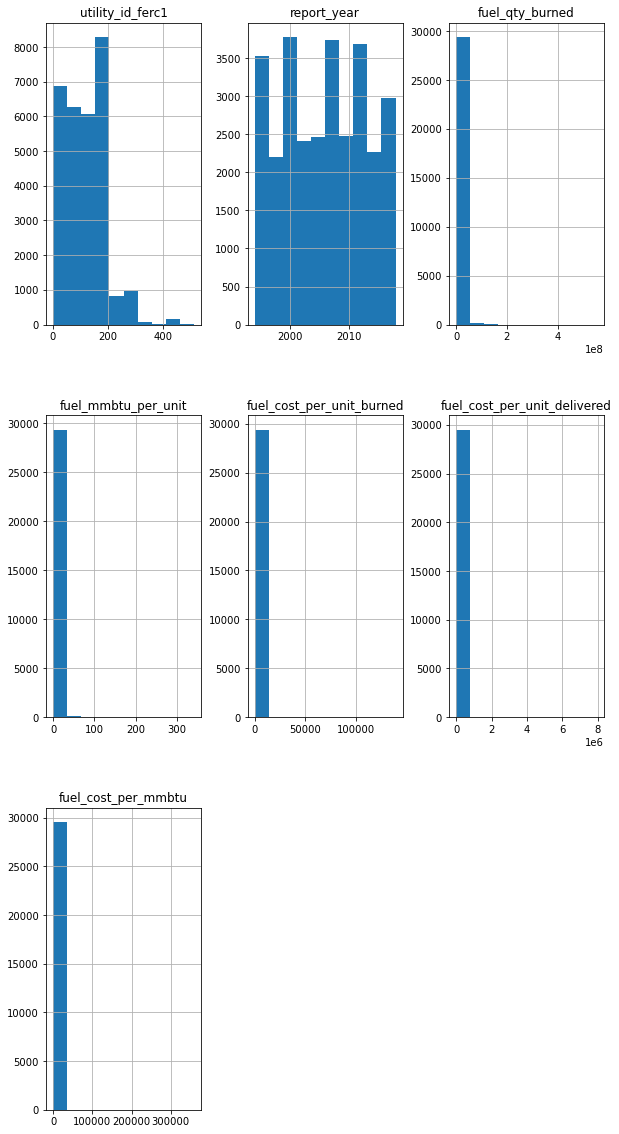

In [13]:
df.hist(figsize = (10, 20))
plt.show()

In [14]:
df.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [15]:
df.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

In [16]:
plant_name_ferc1 = df["plant_name_ferc1"].value_counts()[0:10]
plant_name_ferc1

big stone             156
four corners          151
riverside             133
coyote                121
louisa                119
hayden                 99
lake road              93
ben french station     93
independence           91
oklaunion              90
Name: plant_name_ferc1, dtype: int64

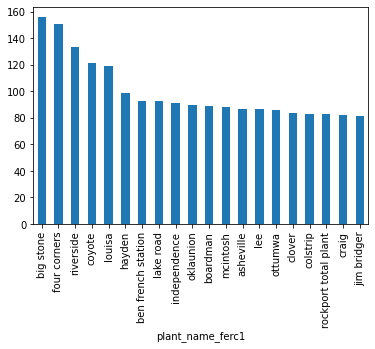

In [17]:
df.groupby("plant_name_ferc1")["report_year"].count().nlargest(20).plot(kind="bar")
plt.show()

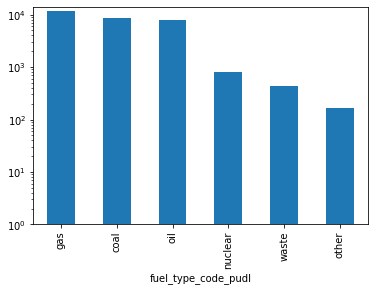

In [18]:
a = df.groupby("fuel_type_code_pudl")["report_year"].count().nlargest(20).plot(kind="bar")
a.set_yscale("log")
a.set_ylim(1, 14000)
plt.show()

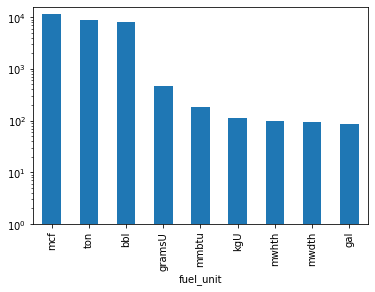

In [19]:
b = df.groupby("fuel_unit")["report_year"].count().nlargest(20).plot(kind="bar")
b.set_yscale("log")
b.set_ylim(1, 16000)
plt.show()

In [20]:
df.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

In [21]:
df[df["fuel_qty_burned"]>300000000]
## fuel_qty_burned is highest in 1995 with j. m. stuart - tota and coal

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
1715,f1_fuel_1995_12_27_1_1,27,1995,j. m. stuart - tota,coal,ton,555894250.0,23.112,33.990,33.39,1.473
1941,f1_fuel_1995_12_74_0_3,74,1995,perry k & w,other,mcf,417297683.0,0.100,0.045,0.00,0.447


In [22]:
df[df["fuel_mmbtu_per_unit"]>123]
## fuel_mmbtu_per_unit is highest in 1998 with river bend, nuclear and fuel unit of mwhth

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
1043,f1_fuel_1994_12_32_4_4,32,1994,byron,nuclear,gramsU,1374547.0,123.890000,0.000,0.0,0.471
1046,f1_fuel_1994_12_32_4_13,32,1994,quad-cities,nuclear,gramsU,378467.0,124.860000,0.000,0.0,0.567
1112,f1_fuel_1994_12_76_0_10,76,1994,quad-cities,nuclear,gramsU,130569.0,124.855946,0.000,0.0,0.474
1277,f1_fuel_1995_12_32_4_10,32,1995,lasalle county,nuclear,gramsU,1219854.0,123.040000,0.000,0.0,0.464
2496,f1_fuel_1996_12_32_4_4,32,1996,byron,nuclear,gramsU,1246177.0,123.010000,0.000,0.0,0.451
2497,f1_fuel_1996_12_32_5_1,32,1996,zion,nuclear,gramsU,1104401.0,125.120000,0.000,0.0,0.467
3670,f1_fuel_1997_12_46_1_7,46,1997,perry #1,nuclear,mmbtu,11694448.0,123.182719,0.661,0.0,0.661
3671,f1_fuel_1997_12_46_1_10,46,1997,beaver valley #1,nuclear,mmbtu,21080884.0,124.879004,0.530,0.0,0.530
4782,f1_fuel_1998_12_63_0_2,63,1998,river bend,nuclear,mwhth,24066875.0,341.260000,1.835,0.0,0.538


In [23]:
df[df["fuel_cost_per_unit_burned"]>80459.000]
## fuel_cost_per_unit_burned is highest in year 2014, plant_name_ferc1 is san juan, oil and the fuel unit is bbl

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
20719,f1_fuel_2011_12_132_1_2,132,2011,solway,oil,bbl,150.0,5.880000,83538.0,137.172,14.207
25127,f1_fuel_2014_12_147_0_2,147,2014,san juan,oil,bbl,49418.0,6.172572,139358.0,136410.000,22.577


In [24]:
df[df["fuel_cost_per_unit_delivered"]>2114508.0]
## fuel_cost_per_unit_delivered is highest in year 1997, when plant_name_ferc1 is peach bt 2&3, nuclear and ngramsU  

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
3244,f1_fuel_1996_12_9_0_8,9,1996,peach bt 2&3,nuclear,gramsU,211407.0,0.000065,36.865,7793482.0,0.145
3564,f1_fuel_1997_12_9_0_8,9,1997,peach bt 2&3,nuclear,gramsU,210474.0,0.000065,37.847,7964521.0,0.578
3565,f1_fuel_1997_12_9_0_11,9,1997,salem 1&2,nuclear,gramsU,36919.0,0.000056,61.100,2255688.0,1.087


In [25]:
df[df["fuel_cost_per_mmbtu"]>450]
## fuel_cost_per_mmbtu is highest in year 2017, rothschild is the plant_name_ferc1 and waste and ton 

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
2373,f1_fuel_1995_12_177_1_4,177,1995,sioux,waste,ton,9367.0,0.014500,17.554,17.537,605.294
10646,f1_fuel_2002_12_166_0_4,166,2002,celanese ii,other,mcf,1060762.0,0.001000,2.537,2.537,2536.971
11852,f1_fuel_2003_12_166_0_4,166,2003,celanese ii,other,mcf,1058318.0,0.001000,2.788,2.788,2788.180
13077,f1_fuel_2004_12_166_0_4,166,2004,celanese ii,other,mcf,1082417.0,0.001000,3.516,3.516,3515.924
14311,f1_fuel_2005_12_166_0_4,166,2005,celanese ii,other,mcf,1127861.0,0.001000,2.797,2.797,2797.354
15509,f1_fuel_2006_12_166_0_4,166,2006,celanese ii,other,mcf,1127865.0,0.001000,3.030,3.030,3030.015
16561,f1_fuel_2007_12_166_0_4,166,2007,celanese ii,other,mcf,1053911.0,0.001000,3.043,3.043,3043.388
17447,f1_fuel_2008_12_166_0_4,166,2008,celanese ii,other,mcf,1057234.0,0.001000,3.045,3.045,3044.916
18836,f1_fuel_2009_12_166_0_4,166,2009,celanese ii,other,mcf,18163.0,0.001000,3.116,3.116,3115.812
28256,f1_fuel_2017_12_193_1_7,193,2017,rothschild,waste,ton,297109.0,0.000009,29.629,29.629,359278.000
